# Predicting Genetic Disorders

* [1. Introduction](#1)
    * [1.1 Imports and Load Data](#1.1)
* [2 Basic Exploration and Data Cleaning](#2)
    * [2.1 Basic Exploration](#2.1)
    * [2.2 Data Cleaning](#2.2)
* [3 Quick Exploratory Data Analysis](#3)
    * [3 EDA Findings](#3.1)
* [4 Preprocessing](#4)
* [5 Compare Base Models](#5)

# 1. Introduction
<a class="anchor" id="1"></a>

The purpose of notebook



Introducing and explaining what the dataset is a record of, etc

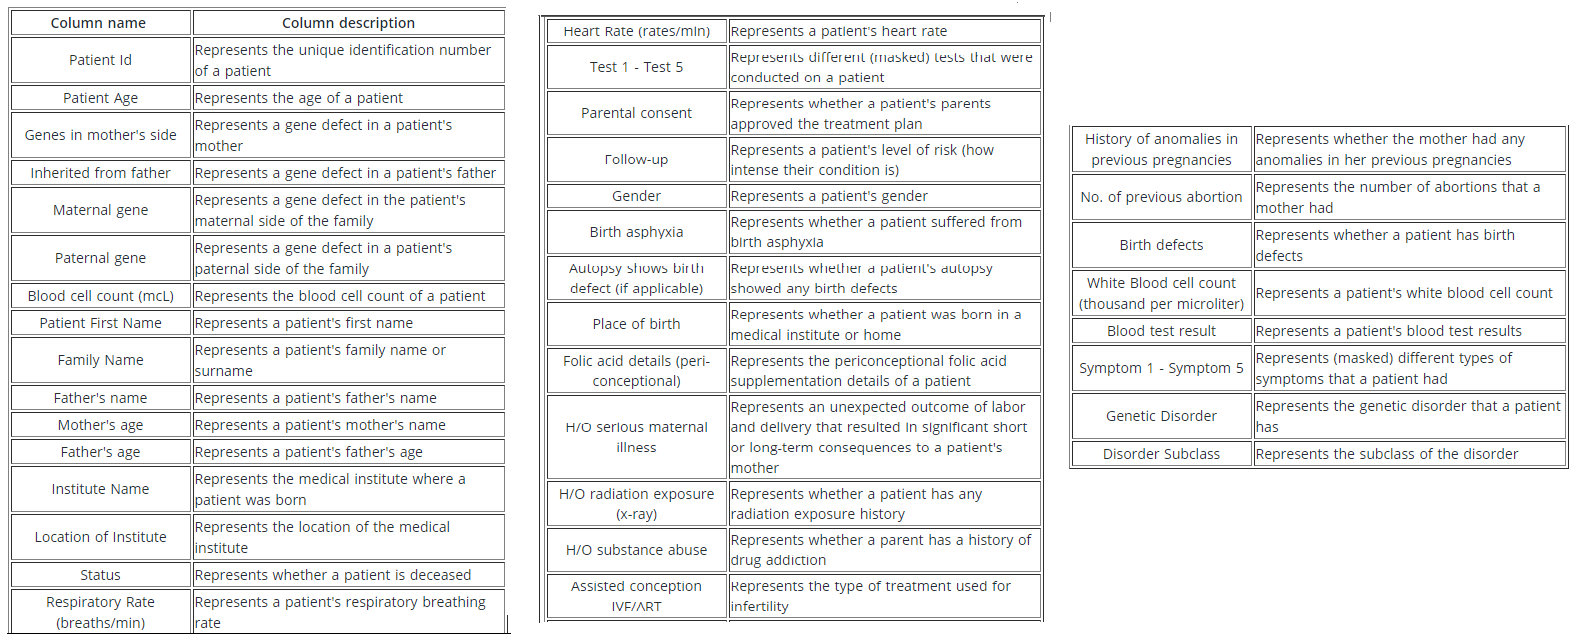

## 1.1 Import Libraries & Load Data
<a class="anchor" id="1.1"></a>

In [119]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from warnings import filterwarnings as filt
filt('ignore')
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('Solarize_Light2')
pd.set_option('display.max_columns', 500)

In [126]:
# Load Data test_genetic_disorders.csv
df = pd.read_csv('train_genetic_disorders.csv')
test_df = pd.read_csv('test_genetic_disorders.csv')
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


# 2. Basic Exploration and Data Cleaning
<a class="anchor" id="2"></a>

## 2.1 Basic Exploration
<a class="anchor" id="2.1"></a>

In [127]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [128]:
#Structure of the table
df.shape

(22083, 45)

In [129]:
df.isnull().sum() / len(df) * 100

Patient Id                                           4.854413
Patient Age                                         11.049223
Genes in mother's side                               4.854413
Inherited from father                                6.154055
Maternal gene                                       17.053842
Paternal gene                                        4.854413
Blood cell count (mcL)                               4.854413
Patient First Name                                   4.854413
Family Name                                         46.696554
Father's name                                        4.854413
Mother's age                                        30.747634
Father's age                                        30.616311
Institute Name                                      26.862292
Location of Institute                                4.854413
Status                                               4.854413
Respiratory Rate (breaths/min)                      14.178327
Heart Ra

In [130]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [270]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_age,16146.0,6.945683,4.318286,0.00000,3.000000,7.000000,11.000000,14.000000
blood_cell_count,17160.0,4.899434,0.199192,4.14623,4.764297,4.900514,5.033921,5.609829
mothers_age,12943.0,34.570810,9.813927,18.00000,26.000000,35.000000,43.000000,51.000000
fathers_age,12969.0,41.961292,13.049332,20.00000,30.000000,42.000000,53.000000,64.000000
num_prev_abortion,15698.0,1.997261,1.409541,0.00000,1.000000,2.000000,3.000000,4.000000
white_blood_cell_count,15626.0,7.470663,2.650636,3.00000,5.417074,7.461071,9.515633,12.000000
symptom_1,15659.0,0.590906,0.491682,0.00000,0.000000,1.000000,1.000000,1.000000
symptom_2,15596.0,0.553347,0.497162,0.00000,0.000000,1.000000,1.000000,1.000000
symptom_3,15707.0,0.538741,0.498513,0.00000,0.000000,1.000000,1.000000,1.000000
symptom_4,15658.0,0.498787,0.500014,0.00000,0.000000,0.000000,1.000000,1.000000


### Issues List For the Dataset

- ~~Change some column names to be easier to work with~~
- ~~Clean location feature~~
- ~~Impute missing values (see Preprocession section)~~
- ~~drop columns related to names~~
- ~~test_x features appear insignificant, will drop~~
- ~~parental_consent is only one value, will drop~~
- ~~autopsy_birth_defect_present has four values: yes, no, none, not applicable. Assuming none means no birth defect present, merge no and none~~
- ~~radiation_exposure_history: Assume ' - ' means none/NA, Combine values~~
- ~~^ same with substance abuse~~
- ~~copy patient ID to separate variable for later~~

## 2.2 Data Cleaning
<a class="anchor" id="2.2"></a>

In [131]:
# Drop unwanted columns

df = df.drop(['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
              'Patient First Name', 'Family Name', 'Father\'s name',
              'Institute Name', 'Location of Institute', 'Parental consent'], axis=1)

test_df = test_df.drop(['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',
              'Patient First Name', 'Family Name', 'Father\'s name',
              'Institute Name', 'Location of Institute', 'Parental consent'], axis=1)

In [132]:
# Rename Columns

df = df.rename(columns= {'Patient Age':'patient_age',
               'Genes in mother\'s side': 'mother_has_genetic_defect',
               'Inherited from father': 'father_has_genetic_defect',
               'Maternal gene': 'mothers_family_has_genetic_defect',
               'Paternal gene': 'fathers_family_has_genetic_defect',
               'Blood cell count (mcL)': 'blood_cell_count',
               'Mother\'s age': 'mothers_age',
               'Father\'s age': 'fathers_age',
               'Status': 'status',
               'Respiratory Rate (breaths/min)': 'respiratory_rate',
               'Heart Rate (rates/min': 'heart_rate',
               'Follow-up': 'follow_up_chance',
               'Gender': 'gender',
               'Birth asphyxia': 'birth_asphyxia',
               'Autopsy shows birth defect (if applicable)': 'autopsy_birth_defect_present',
               'Place of birth': 'place_of_birth',
               'Folic acid details (peri-conceptional)': 'folic_acid_details',
               'H/O serious maternal illness': 'pregnancy_complications',
               'H/O radiation exposure (x-ray)': 'radiation_exposure_history',
               'H/O substance abuse': 'substance_abuse',
               'Assisted conception IVF/ART': 'assisted_conception',
               'History of anomalies in previous pregnancies': 'previous_pregnancy_anomaly',
               'No. of previous abortion': 'num_prev_abortion',
               'Birth defects': 'birth_defects',
               'White Blood cell count (thousand per microliter)': 'white_blood_cell_count',
               'Blood test result': 'blood_test_result',
               'Symptom 1': 'symptom_1',
               'Symptom 2': 'symptom_2',
               'Symptom 3': 'symptom_3',
               'Symptom 4': 'symptom_4',
               'Symptom 5': 'symptom_5',
               'Genetic Disorder': 'genetic_disorder',
               'Disorder Subclass': 'disorder_subclass'})

test_df = test_df.rename(columns= {'Patient Age':'patient_age',
               'Genes in mother\'s side': 'mother_has_genetic_defect',
               'Inherited from father': 'father_has_genetic_defect',
               'Maternal gene': 'mothers_family_has_genetic_defect',
               'Paternal gene': 'fathers_family_has_genetic_defect',
               'Blood cell count (mcL)': 'blood_cell_count',
               'Mother\'s age': 'mothers_age',
               'Father\'s age': 'fathers_age',
               'Status': 'status',
               'Respiratory Rate (breaths/min)': 'respiratory_rate',
               'Heart Rate (rates/min': 'heart_rate',
               'Follow-up': 'follow_up_chance',
               'Gender': 'gender',
               'Birth asphyxia': 'birth_asphyxia',
               'Autopsy shows birth defect (if applicable)': 'autopsy_birth_defect_present',
               'Place of birth': 'place_of_birth',
               'Folic acid details (peri-conceptional)': 'folic_acid_details',
               'H/O serious maternal illness': 'pregnancy_complications',
               'H/O radiation exposure (x-ray)': 'radiation_exposure_history',
               'H/O substance abuse': 'substance_abuse',
               'Assisted conception IVF/ART': 'assisted_conception',
               'History of anomalies in previous pregnancies': 'previous_pregnancy_anomaly',
               'No. of previous abortion': 'num_prev_abortion',
               'Birth defects': 'birth_defects',
               'White Blood cell count (thousand per microliter)': 'white_blood_cell_count',
               'Blood test result': 'blood_test_result',
               'Symptom 1': 'symptom_1',
               'Symptom 2': 'symptom_2',
               'Symptom 3': 'symptom_3',
               'Symptom 4': 'symptom_4',
               'Symptom 5': 'symptom_5',
               'Genetic Disorder': 'genetic_disorder',
               'Disorder Subclass': 'disorder_subclass'})

In [133]:
#dropping unwanted fields
df = df.drop('Patient Id', axis=1)
test_df = test_df.drop('Patient Id', axis=1)

In [134]:
print(f'New dataframe shape: {df.shape}')

New dataframe shape: (22083, 33)


In [135]:
df['autopsy_birth_defect_present'] = df['autopsy_birth_defect_present'].str.replace('None', 'No') 
df['radiation_exposure_history'] = df['radiation_exposure_history'].str.replace('-', 'Not applicable')
df['substance_abuse'] = df['substance_abuse'].str.replace('-', 'Not applicable')
df = df[df['genetic_disorder'].notna()]
df = df[df['disorder_subclass'].notna()]

test_df['autopsy_birth_defect_present'] = test_df['autopsy_birth_defect_present'].str.replace('None', 'No') 
test_df['radiation_exposure_history'] = test_df['radiation_exposure_history'].str.replace('-', 'Not applicable')
test_df['substance_abuse'] = test_df['substance_abuse'].str.replace('-', 'Not applicable')

# 3. Quick EDA
<a class="anchor" id="3"></a>

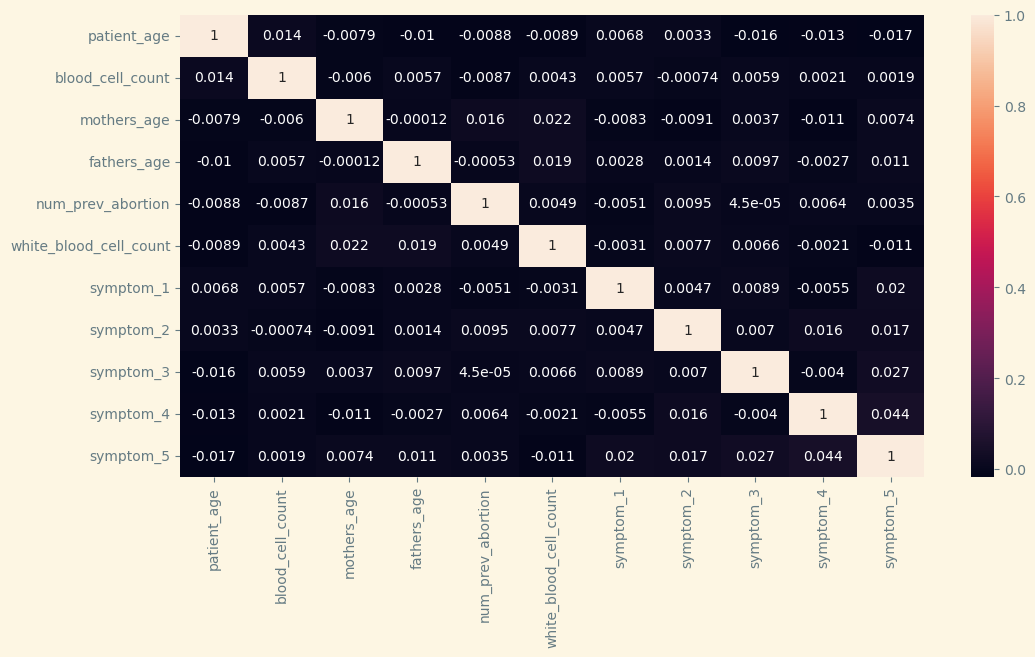

In [269]:
#Finding correlational matrix
corr = df.corr()
sns.heatmap(corr,  annot=True)
plt.show()

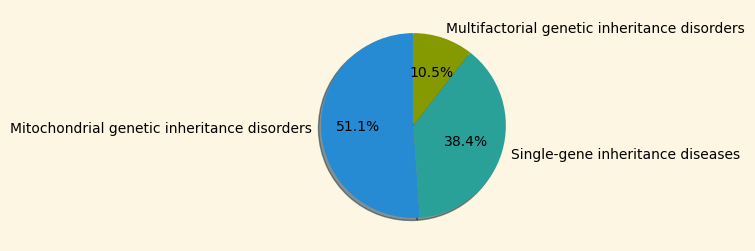

In [282]:
#visualizing in Pie chart
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)
plt.figure(figsize = (3,3))
plt.pie(df.genetic_disorder.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90);

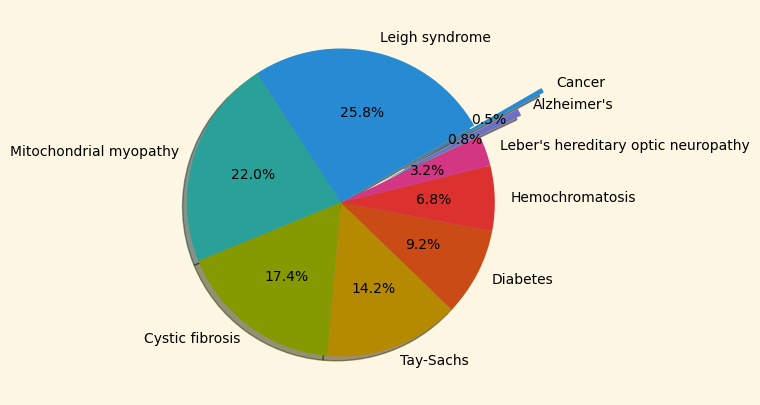

In [284]:
#visualizing in Pie chart
labels2 = 'Leigh syndrome', 'Mitochondrial myopathy', 'Cystic fibrosis', 'Tay-Sachs', 'Diabetes', 'Hemochromatosis', "Leber's hereditary optic neuropathy", "Alzheimer's", 'Cancer'
explode2 = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.5)
plt.figure(figsize = (5,5))
plt.pie(df.disorder_subclass.value_counts(), explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=30);

Loading: 100%|██████████| 33/33 [00:04<00:00,  8.14it/s]


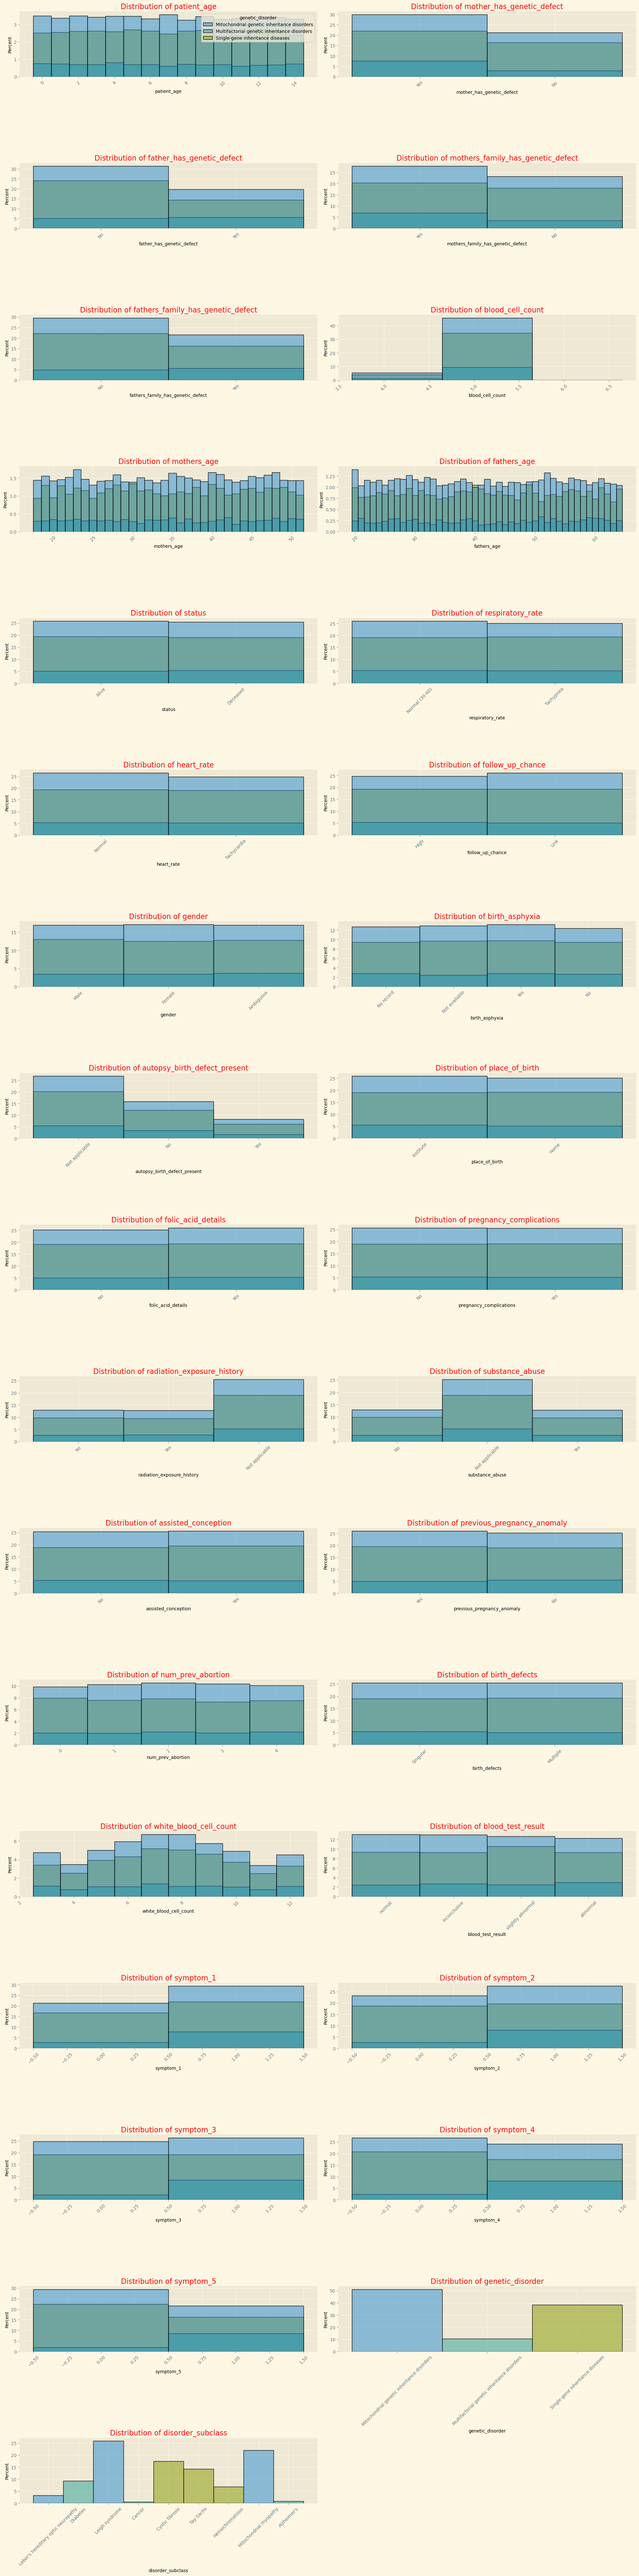

In [145]:
#Plotting all the relations
plt.figure(figsize = (20,80))
plotnumber = 1

for i in tqdm(range(0,33),desc='Loading'):
        ax = plt.subplot(17, 2, plotnumber)
        if plotnumber == 1:
            sns.histplot(x = df.columns[i], hue='genetic_disorder', data = df, ax = ax, discrete=True, legend=True, stat='percent')
        else:
            sns.histplot(x = df.columns[i], hue='genetic_disorder', data = df, ax = ax, discrete=True, legend=False, stat='percent')
        plt.title(f'Distribution of {df.columns[i]}',color='red')
        plt.xticks(rotation=45)
        plotnumber += 1
        

plt.tight_layout()
plt.show()

## 3.1. Findings
<a class="anchor" id="3.1"></a>

- Patient age is evenly distributed 0-14 yrs of age
- Genetic disorders appear more likely to be inherited from the maternal side of the family
- Mitochondrial genetic inheritance disorders are most common, account for about 50% of genetic defects. This supports the idea that genetic defects are more likely passed through maternal side of the family because Mitochondrial defects are passed from mother to child
- Of the genetic disorders, the most frequent subclass is Leigh Syndrome, accounting for about 25% of defects, followed by mitochondrial myopathy 

# 4. Preprocessing
<a class="anchor" id="4"></a>

In [183]:
X = df.copy()
X_test  = test_df.copy()

In [184]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
for colname in X_test.select_dtypes("object"):
    X_test[colname], _ = X_test[colname].factorize()

In [185]:
y1 = X.pop('genetic_disorder')
y2 = X.pop('disorder_subclass')

In [186]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

X_test = pd.DataFrame(my_imputer.fit_transform(X_test))

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1)

# 5. Comparing Base Models
<a class="anchor" id="5"></a>

In [205]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#defining the models
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    SVC(C=10),
    DecisionTreeClassifier(),
    RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', max_depth = 161, n_estimators = 195 ),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    ]
names=['LR','SVC','KNN','DTC','RF','AdaB','GBC','GNB']
score=[]

In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [215]:
#Measuring the performance
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("=" * 60)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    report = classification_report(y_test, train_predictions, target_names=["0", "1","2"])
    print("Classification Report:\n", report)

    log_entry = pd.DataFrame([[name, acc * 100]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)
    
print("=" * 60)

LogisticRegression
****Results****
Accuracy: 50.4429%
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.96      0.66      2110
           1       0.48      0.31      0.38       455
           2       1.00      0.00      0.01      1725

    accuracy                           0.50      4290
   macro avg       0.66      0.42      0.35      4290
weighted avg       0.70      0.50      0.37      4290

KNeighborsClassifier
****Results****
Accuracy: 49.8601%
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.70      0.61      2110
           1       0.31      0.19      0.24       455
           2       0.46      0.34      0.39      1725

    accuracy                           0.50      4290
   macro avg       0.44      0.41      0.41      4290
weighted avg       0.48      0.50      0.48      4290

SVC
****Results****
Accuracy: 52.4476%
Classification Report:
               pre

In [240]:
for i in nn:
    print(i)

LogisticRegression
KNeighborsClassifier
SVC
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
GaussianNB


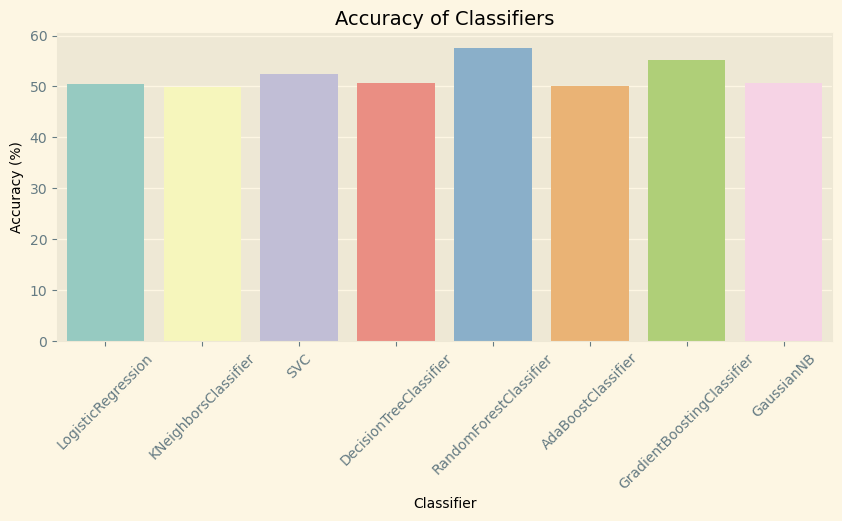

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

sns.barplot(data=log, x="Classifier", y="Accuracy", palette="Set3")

plt.title("Accuracy of Classifiers", fontsize=14)
plt.xlabel("Classifier", fontsize=10)
plt.ylabel("Accuracy (%)", fontsize=10)

plt.xticks(rotation=45)
plt.yticks(fontsize=10)

plt.show()

In [224]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Accuracy: 0.5729603729603729
